In [1]:
import mlflow
import pickle
import sys
sys.path.insert(1, '../library')
import database_helper
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os
import numpy as np


In [2]:
os.environ["MLFLOW_TRACKING_USERNAME"] = "user"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "password"
mlflow.set_tracking_uri(uri="http://mlflow.local:80")
mlflow.set_experiment("DWD Isolation Forest")
mlflow.autolog()

2024/07/29 20:43:07 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


In [3]:
with open('selected_columns.pkl', 'rb') as f:
    selected_columns = pickle.load(f)
dataframe = database_helper.query_data(field_list=selected_columns)
dataframe['_time'] = pd.to_datetime(dataframe['_time'])
dataframe.set_index('_time', inplace=True)
dataframe = dataframe.select_dtypes(include='float64')
dataframe.interpolate(inplace=True)
display(dataframe)

,10838_days_0_precipitation,10838_days_0_temperatureMax,10838_days_0_windDirection,10838_days_1_sunshine,10838_days_1_temperatureMin,10838_days_1_windDirection,10838_days_2_precipitation,10838_days_2_sunshine,10838_days_2_temperatureMax,10838_days_2_temperatureMin,...,10840_days_7_windDirection,10840_days_8_sunshine,10840_days_8_temperatureMax,10840_days_8_temperatureMin,10840_days_8_windDirection,10840_days_8_windGust,10840_days_9_precipitation,10840_days_9_sunshine,10840_days_9_temperatureMax,10840_days_9_windDirection
_time,,,,,,,,,,,,,,,,,,,,,
2024-07-28 12:00:00+00:00,59.0,229.0,3210.0,8200.0,119.0,720.0,0.0,7590.0,303.0,123.0,...,2580.0,4360.0,236.0,151.0,2470.0,315.0,0.0,4280.0,246.0,2380.0
2024-07-28 12:00:10+00:00,59.0,229.0,3210.0,8200.0,119.0,720.0,0.0,7590.0,303.0,123.0,...,2580.0,4360.0,236.0,151.0,2470.0,315.0,0.0,4280.0,246.0,2380.0
2024-07-28 12:00:20+00:00,59.0,229.0,3210.0,8200.0,119.0,720.0,0.0,7590.0,303.0,123.0,...,2580.0,4360.0,236.0,151.0,2470.0,315.0,0.0,4280.0,246.0,2380.0
2024-07-28 12:00:30+00:00,59.0,229.0,3210.0,8200.0,119.0,720.0,0.0,7590.0,303.0,123.0,...,2580.0,4360.0,236.0,151.0,2470.0,315.0,0.0,4280.0,246.0,2380.0
2024-07-28 12:00:40+00:00,59.0,229.0,3210.0,8200.0,119.0,720.0,0.0,7590.0,303.0,123.0,...,2580.0,4360.0,236.0,151.0,2470.0,315.0,0.0,4280.0,246.0,2380.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-29 18:42:20+00:00,16.0,262.0,740.0,7650.0,129.0,1950.0,27.0,5880.0,288.0,187.0,...,2510.0,4790.0,249.0,152.0,2510.0,296.0,0.0,4500.0,248.0,2560.0
2024-07-29 18:42:30+00:00,16.0,262.0,740.0,7650.0,129.0,1950.0,27.0,5880.0,288.0,187.0,...,2510.0,4790.0,249.0,152.0,2510.0,296.0,0.0,4500.0,248.0,2560.0
2024-07-29 18:42:40+00:00,16.0,262.0,740.0,7650.0,129.0,1950.0,27.0,5880.0,288.0,187.0,...,2510.0,4790.0,249.0,152.0,2510.0,296.0,0.0,4500.0,248.0,2560.0


In [4]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dataframe)
display(data_scaled)

array([[ 1.30061111, -1.43805682,  1.43891922, ..., -2.18294405,
        -0.74120291, -1.96580428],
       [ 1.30061111, -1.43805682,  1.43891922, ..., -2.18294405,
        -0.74120291, -1.96580428],
       [ 1.30061111, -1.43805682,  1.43891922, ..., -2.18294405,
        -0.74120291, -1.96580428],
       ...,
       [-0.30061299,  0.77803903, -0.70947913, ...,  0.38642571,
         1.20056961,  1.14498699],
       [-0.30061299,  0.77803903, -0.70947913, ...,  0.38642571,
         1.20056961,  1.14498699],
       [-0.30061299,  0.77803903, -0.70947913, ...,  0.38642571,
         1.20056961,  1.14498699]])

2024/07/29 20:43:09 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '359e4f40ddca4e528186ee4fe41d9e98', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/07/29 20:43:10 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.
2024/07/29 20:43:10 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2024/07/29 20:43:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run gregarious-stork-471 at: http://mlflow.local:80/#/experiments/1/runs/359e4f40ddca4e528186ee4fe41d9e98.
2024/07/29 20:43:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.local:80/#/experiments/1.
2024/07/29 20:43:13 INFO mlflow.utils.autologging_utils: Created MLflow autolo

Number of components needed to explain 95% of the variance: 5
Shape of the transformed dataset: (11058, 5)


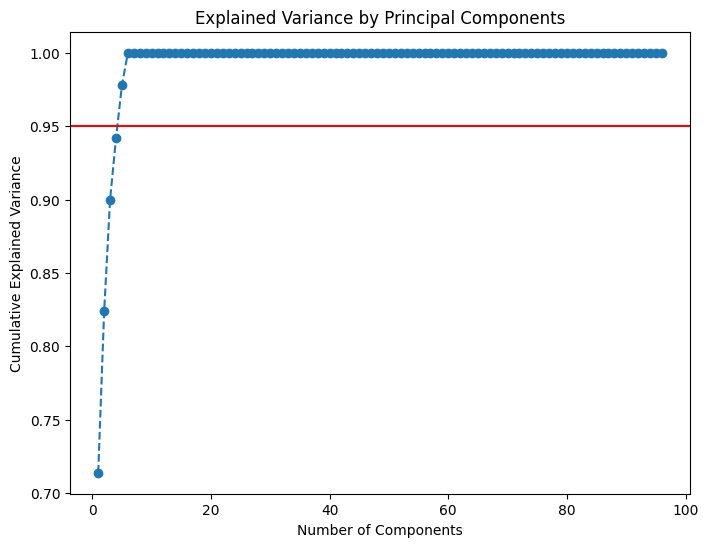

In [5]:
#pca = PCA(n_components=10)  # You can adjust the number of components
pca = PCA()
data_pca = pca.fit(data_scaled)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

pca_optimal = PCA(n_components=n_components)
data_pca = pca_optimal.fit_transform(data_scaled)

# Print the result
print(f"Number of components needed to explain 95% of the variance: {n_components}")
print("Shape of the transformed dataset:", data_pca.shape)

# Plot the explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()



In [6]:
# Fit the model
model = IsolationForest(contamination=0.05)  # Adjust contamination based on your needs
model.fit(data_pca)
# Predict anomalies
anomalies = model.predict(data_pca)
# -1 for anomalies, 1 for normal instances
dataframe['anomaly'] = anomalies

2024/07/29 20:43:17 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '6f8374517e73455fae353ef1766f23e4', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/07/29 20:43:18 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.
2024/07/29 20:43:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run funny-smelt-973 at: http://mlflow.local:80/#/experiments/1/runs/6f8374517e73455fae353ef1766f23e4.
2024/07/29 20:43:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.local:80/#/experiments/1.


,10838_days_0_precipitation,10838_days_0_temperatureMax,10838_days_0_windDirection,10838_days_1_sunshine,10838_days_1_temperatureMin,10838_days_1_windDirection,10838_days_2_precipitation,10838_days_2_sunshine,10838_days_2_temperatureMax,10838_days_2_temperatureMin,...,10840_days_8_sunshine,10840_days_8_temperatureMax,10840_days_8_temperatureMin,10840_days_8_windDirection,10840_days_8_windGust,10840_days_9_precipitation,10840_days_9_sunshine,10840_days_9_temperatureMax,10840_days_9_windDirection,anomaly
_time,,,,,,,,,,,,,,,,,,,,,
2024-07-28 12:00:00+00:00,59.0,229.0,3210.0,8200.0,119.0,720.0,0.0,7590.0,303.0,123.0,...,4360.0,236.0,151.0,2470.0,315.0,0.0,4280.0,246.0,2380.0,-1
2024-07-28 12:00:10+00:00,59.0,229.0,3210.0,8200.0,119.0,720.0,0.0,7590.0,303.0,123.0,...,4360.0,236.0,151.0,2470.0,315.0,0.0,4280.0,246.0,2380.0,-1
2024-07-28 12:00:20+00:00,59.0,229.0,3210.0,8200.0,119.0,720.0,0.0,7590.0,303.0,123.0,...,4360.0,236.0,151.0,2470.0,315.0,0.0,4280.0,246.0,2380.0,-1
2024-07-28 12:00:30+00:00,59.0,229.0,3210.0,8200.0,119.0,720.0,0.0,7590.0,303.0,123.0,...,4360.0,236.0,151.0,2470.0,315.0,0.0,4280.0,246.0,2380.0,-1
2024-07-28 12:00:40+00:00,59.0,229.0,3210.0,8200.0,119.0,720.0,0.0,7590.0,303.0,123.0,...,4360.0,236.0,151.0,2470.0,315.0,0.0,4280.0,246.0,2380.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-29 16:35:40+00:00,10.0,260.0,740.0,7730.0,128.0,1890.0,1.0,5490.0,284.0,186.0,...,4690.0,246.0,152.0,2430.0,296.0,1.0,4460.0,247.0,2540.0,-1
2024-07-29 16:35:50+00:00,10.0,260.0,740.0,7730.0,128.0,1890.0,1.0,5490.0,284.0,186.0,...,4690.0,246.0,152.0,2430.0,296.0,1.0,4460.0,247.0,2540.0,-1
2024-07-29 16:36:00+00:00,10.0,260.0,740.0,7730.0,128.0,1890.0,1.0,5490.0,284.0,186.0,...,4690.0,246.0,152.0,2430.0,296.0,1.0,4460.0,247.0,2540.0,-1


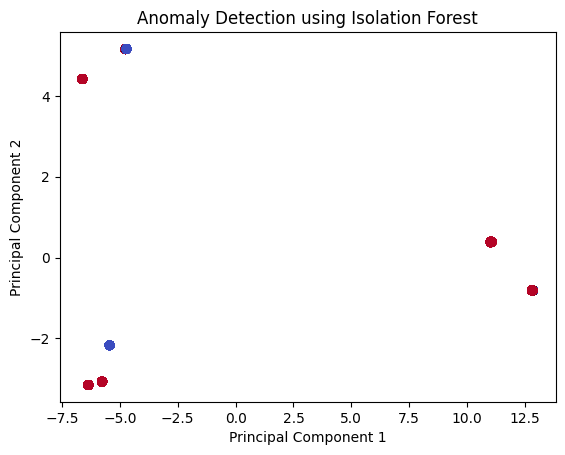

In [7]:
# Get the anomaly data
anomalies = dataframe[dataframe['anomaly'] == -1]
display(anomalies)
# Visualize the anomalies (optional)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=dataframe['anomaly'], cmap='coolwarm')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Anomaly Detection using Isolation Forest')
plt.show()